In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1)
# movies.head(1)['keywords'].values  # Just Looking all keywords of movie.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)
# credits.head(1)['cast'].values # Just Looking cast of movie.

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies.shape

(4803, 20)

In [6]:
credits.shape

(4803, 4)

In [7]:
movies = movies.merge(credits,on='title')
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
movies.shape

(4809, 23)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [10]:
movies['original_language'].value_counts()  # 95% movies of english language so we don't take this features because it will create problem.
# Same with original_title features so will take title as feature it will have english named title.

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [11]:
"""
Important Features for Movie Recommendations System.
    1. genres
    2. id
    3. keywords (Tags)
    4. title
    5. overview
    6. cast
    7. crew
    8. release_date

"""

'\nImportant Features for Movie Recommendations System.\n    1. genres\n    2. id\n    3. keywords (Tags)\n    4. title\n    5. overview\n    6. cast\n    7. crew\n    8. release_date\n\n'

In [12]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
"""
    Now doing Data Preprocessing
    => genres and keyword are not in right format.
    => There are so many actor names in cast section in that we only take top 3 actors name for recommadation.
    => There are so many crew names like director,camera man,script writer,designer etc we don't that all so we will take only director 
       names for recommadation.
    => and also remove missing data & dubicate value.
"""

"\n    Now doing Data Preprocessing\n    => genres and keyword are not in right format.\n    => There are so many actor names in cast section in that we only take top 3 actors name for recommadation.\n    => There are so many crew names like director,camera man,script writer,designer etc we don't that all so we will take only director \n       names for recommadation.\n    => and also remove missing data & dubicate value.\n"

In [14]:
 movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [15]:
movies.dropna(inplace=True)# only three null value so drop it.

In [16]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
movies.duplicated().sum()

0

In [18]:
movies.iloc[0].genres   # Format is String[list of Dic] => converting to List format

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
import ast

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [20]:
movies['genres'] = movies['genres'].apply(convert)
movies.head() # genres solved.

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
def fetch_topCast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [23]:
movies['cast'] = movies['cast'].apply(fetch_topCast)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [25]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [26]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [27]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [28]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [29]:
movies.sample(10)

,movie_id,title,overview,genres,keywords,cast,crew
1366,45054,There Be Dragons,Arising out of the horror of the Spanish Civil...,[Drama],"[spanishcivilwar, priest, independentfilm, cat...","[CharlieCox, DougrayScott, WesBentley]",[RolandJoffé]
1580,8780,Baby Mama,"A successful, single businesswoman who dreams ...",[Comedy],"[pregnancyandbirth, surrogatemother]","[TinaFey, AmyPoehler, DaxShepard]",[MichaelMcCullers]
1698,24071,Mumford,"In the small town of Mumford, a psychologist o...","[Comedy, Drama, Romance]",[],"[LorenDean, HopeDavis, JasonLee]",[LawrenceKasdan]
2626,133694,Promised Land,A salesman for a natural gas company experienc...,[Drama],"[smalltown, campaign, salesman, farmland, natu...","[MattDamon, JohnKrasinski, FrancesMcDormand]",[GusVanSant]
3215,1547,The Lost Boys,A mother and her two teenage sons move to a se...,"[Horror, Comedy]","[streetgang, smalltown, vampire, comicbook, bo...","[JasonPatric, CoreyHaim, CoreyFeldman]",[JoelSchumacher]
2257,334531,My All American,"Freddie Steinmark, an underdog on the gridiron...",[Drama],"[americanfootball, biography, sport, champions...","[AaronEckhart, FinnWittrock, RobinTunney]",[AngeloPizzo]
1175,9036,Eight Below,"In the Antarctic, after an expedition with Dr....","[Adventure, Drama, Family]","[expedition, pilot, survival, sleddogs, seal]","[PaulWalker, BruceGreenwood, MoonBloodgood]",[FrankMarshall]
4402,91122,16 to Life,Romantic comedy. A small town teenager's angst...,"[Comedy, Romance]","[affection, womandirector]","[HalleeHirsh, TheresaRussell, ShilohFernandez]",[BeckySmith]
4596,157909,Show Me,When two squeegee kids descend upon Sarah and ...,"[Drama, Thriller]",[kidnapping],"[MichelleNolden, KatharineIsabelle, KettTurton]",[CassandraNicolaou]
4307,60400,The Blue Bird,Set in mid-Europe sometime in the late 18th ce...,"[Drama, Family, Fantasy]",[bird],"[ShirleyTemple, SpringByington, NigelBruce]",[WalterLang]


In [30]:
movies['overview'] = movies['overview'].apply(lambda x:x.split()) # Overview is string so convert it into list

In [31]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [32]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew,tags
4350,10643,Godzilla 2000,"[Godzilla, saves, Tokyo, from, a, flying, sauc...","[Adventure, Horror, Action, ScienceFiction]","[japan, monster, flyingsaucer, godzilla, city,...","[TakehiroMurata, NaomiNishida, MayuSuzuki]",[TakaoOkawara],"[Godzilla, saves, Tokyo, from, a, flying, sauc..."
1534,302156,Criminal,"[Bill, Pope, is, a, CIA, agent, on, a, mission...",[Action],"[cia, memory, convict, implant]","[KevinCostner, GaryOldman, TommyLeeJones]",[ArielVromen],"[Bill, Pope, is, a, CIA, agent, on, a, mission..."
4520,83,Open Water,"[Two, divers, are, left, out, at, sea, without...","[Drama, Thriller]","[diving, cataclysm, nightmare, panic, redsea, ...","[BlanchardRyan, DanielTravis, SaulStein]",[ChrisKentis],"[Two, divers, are, left, out, at, sea, without..."
3459,629,The Usual Suspects,"[Held, in, an, L.A., interrogation, room,, Ver...","[Drama, Crime, Thriller]","[law, relatives, theft, criminal, criminalmast...","[StephenBaldwin, GabrielByrne, ChazzPalminteri]",[BryanSinger],"[Held, in, an, L.A., interrogation, room,, Ver..."
2863,14976,Rachel Getting Married,"[A, young, woman, who, has, been, in, and, out...",[Drama],"[sister, independentfilm, maidofhonor]","[AnneHathaway, RosemarieDeWitt, SebastianStan]",[JonathanDemme],"[A, young, woman, who, has, been, in, and, out..."


In [33]:
new_movies = movies[['movie_id','title','tags','genres']]
new_movies.head()

,movie_id,title,tags,genres
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]"
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]"


In [34]:
new_movies['tags'][1] # tag of one movie

['Captain',
 'Barbossa,',
 'long',
 'believed',
 'to',
 'be',
 'dead,',
 'has',
 'come',
 'back',
 'to',
 'life',
 'and',
 'is',
 'headed',
 'to',
 'the',
 'edge',
 'of',
 'the',
 'Earth',
 'with',
 'Will',
 'Turner',
 'and',
 'Elizabeth',
 'Swann.',
 'But',
 'nothing',
 'is',
 'quite',
 'as',
 'it',
 'seems.',
 'Adventure',
 'Fantasy',
 'Action',
 'ocean',
 'drugabuse',
 'exoticisland',
 'eastindiatradingcompany',
 "loveofone'slife",
 'traitor',
 'shipwreck',
 'strongwoman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger',
 'JohnnyDepp',
 'OrlandoBloom',
 'KeiraKnightley',
 'GoreVerbinski']

In [35]:
#Now we have to convert words like ['loved','loving','love'] to ['love','love','love'] 
# For this we will apply 'stemming' so we will use nltk library in that we will use stem porter.

In [36]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving') # Demo of Stem

'love'

In [37]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
stem("Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems. Adventure Fantasy Action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger JohnnyDepp OrlandoBloom KeiraKnightley GoreVerbinski")
# Function usage

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [39]:
new_movies['tags'] = new_movies['tags'].apply(lambda x: " ".join(x))
new_movies.head()

C:\Users\Nisarg Modi\AppData\Local\Temp\ipykernel_11568\3247989072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x: " ".join(x))


,movie_id,title,tags,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]"


In [40]:
new_movies['tags'] = new_movies['tags'].apply(stem)

C:\Users\Nisarg Modi\AppData\Local\Temp\ipykernel_11568\3229886743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(stem)


In [41]:
new_movies

,movie_id,title,tags,genres
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...","[Adventure, Fantasy, Action]"
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"john carter is a war-weary, former militari ca...","[Action, Adventure, ScienceFiction]"
...,...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,"[Action, Crime, Thriller]"
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...,"[Comedy, Romance]"
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q...","[Comedy, Drama, Romance, TVMovie]"
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...,[]


In [42]:
new_movies['tags'][1] # Stemming Done.

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [43]:
'''
**STEPS**
For the Recommendation system I will use 'vectorization' ==> 'text vectorization' => 'Bag of words'.
    1. First Combine all the tags [tag1+tag2+....+tagN] say 'large text'
    2. From 'large text' we will calculate frequency and then extract top 5000 most common words.
    3. w1|w2|w3|....|w5000
    4. Let w1 be action,w2 be future and so on....
    5.        w1|w2|w3|...|w5000
      movie1-> 5,3,1,.....,2 [Freq. of tags in the movie1].
      movie2-> 4,1,2,.....,0 [Freq. of tags in the movie2].
      above is of (5000,5000) which is vector.
    In vectorization we don't consider 'stop word' i.e. are,and,of,to,from and so on...
'''

"\n**STEPS**\nFor the Recommendation system I will use 'vectorization' ==> 'text vectorization' => 'Bag of words'.\n    1. First Combine all the tags [tag1+tag2+....+tagN] say 'large text'\n    2. From 'large text' we will calculate frequency and then extract top 5000 most common words.\n    3. w1|w2|w3|....|w5000\n    4. Let w1 be action,w2 be future and so on....\n    5.        w1|w2|w3|...|w5000\n      movie1-> 5,3,1,.....,2 [Freq. of tags in the movie1].\n      movie2-> 4,1,2,.....,0 [Freq. of tags in the movie2].\n      above is of (5000,5000) which is vector.\n    In vectorization we don't consider 'stop word' i.e. are,and,of,to,from and so on...\n"

In [44]:
# Text-Vectorization...

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [46]:
vectors = cv.fit_transform(new_movies['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
vectors.shape

(4806, 5000)

In [48]:
# We use Cosine Distance to calculate distance between vectors because of curse of dimensionality problem[so we don't use Eulian distance].
# we know 'distance' is inversly proportional to 'similarity'
# More 'Distance' less 'Similarity' & Less 'Distance' More 'Similarity'.

In [49]:
# we will use Cosine Similarity from sklearn which will result in '0' means less similar and '1' means more Similar
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [51]:
similarity.shape

(4806, 4806)

In [52]:
new_movies[new_movies['title'] == 'Batman Begins'].index[0] # This will give index of Batman Begins movie

119

In [53]:
# def recommend(movie):
#     index = new_movies[new_movies['title'] == movie].index[0]
#     distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
#     for i in distances[1:6]:
#         print(new_movies.iloc[i[0]].title)

def recommend(movie, n_recommendations=5):
    index = new_movies[new_movies['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommendation_movies = []
    for i in distances[1:6]:
        recommendation_movies.append(new_movies.iloc[i[0]].title) 
        # print(new_movies.iloc[i[0]].title)
    return recommendation_movies 
    

In [54]:
print(recommend('Avatar',5))


['Aliens vs Predator: Requiem', 'Aliens', 'Falcon Rising', 'Independence Day', 'Titan A.E.']


In [55]:
recommend('Batman Begins',5)

['The Dark Knight', 'Batman', 'Batman', 'The Dark Knight Rises', '10th & Wolf']

In [56]:
similarity_threshold = 0.08

In [60]:
def count_relevant_movies(movie, similarity_threshold=0.5):
    # Get the index of the target movie
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    
    # Get the similarity scores for the target movie
    similarity_scores = similarity[movie_index]
    
    # Use the recommend function to get recommended movie titles
    recommended_movies = recommend(movie, len(new_movies))
    
    # Count relevant movies based on the similarity threshold
    total_relevant_movies = 0
    for recommended_movie in recommended_movies:
        # Get the index of each recommended movie
        recommended_movie_index = new_movies[new_movies['title'] == recommended_movie].index[0]
        
        # Check if the similarity score is above the threshold
        if similarity_scores[recommended_movie_index] > similarity_threshold:
            total_relevant_movies += 1

    return total_relevant_movies


In [62]:
similarity_threshold = 0.08
movie = 'Avatar'
total_relevant = count_relevant_movies(movie, similarity_threshold)
print(f"Total relevant movies for '{movie}' (similarity > {similarity_threshold}): {total_relevant}")

Total relevant movies for 'Avatar' (similarity > 0.08): 4


In [58]:
def recall_at_k(recommended_movies, relevant_movies, k):
    relevant_in_recommendations = [movie for movie in recommended_movies[:k] if movie in relevant_movies]
    recall = len(relevant_in_recommendations) / len(relevant_movies)
    return recall

In [57]:
def precision_at_k(recommended_movies, relevant_movies, k):
    relevant_in_recommendations = [movie for movie in recommended_movies[:k] if movie in relevant_movies]
    precision = len(relevant_in_recommendations) / k
    return precision

In [64]:
def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

In [65]:
def plot_precision_recall(recommended_movies, relevant_movies, max_k):
    precision_values = []
    recall_values = []
    f1_values = []
    ks = list(range(1, max_k + 1))
    
    for k in ks:
        precision = precision_at_k(recommended_movies, relevant_movies, k)
        recall = recall_at_k(recommended_movies, relevant_movies, k)
        f1 = f1_score_at_k(precision, recall)
        
        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(ks, precision_values, label="Precision@K", marker='o')
    plt.plot(ks, recall_values, label="Recall@K", marker='x')
    plt.plot(ks, f1_values, label="F1-Score@K", marker='s')
    
    plt.xlabel('K (Top-K Recommendations)')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-Score @ K')
    plt.legend()
    plt.grid(True)
    plt.show()

In [76]:
# recommended_movies = recommend('Avatar')
recommended_movies = recommend('Batman Begins')

In [73]:
def get_relevant_movies(movie, similarity_threshold=0.7):
    # Get the index of the target movie
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    
    # Get the similarity scores for the target movie
    similarity_scores = similarity[movie_index]
    
    # Find movies with similarity above the threshold (excluding the movie itself)
    relevant_movies = []
    for idx, sim_score in enumerate(similarity_scores):
        if sim_score > similarity_threshold and idx != movie_index:  # Exclude the movie itself
            relevant_movies.append(new_movies.iloc[idx].title)
    
    return relevant_movies


In [81]:
# relevant_movies = get_relevant_movies('Avatar', similarity_threshold=0.2)
# print("Relevant movies:", relevant_movies)
relevant_movies = get_relevant_movies('Batman Begins', similarity_threshold=0.25)
print("Relevant movies:", relevant_movies)

Relevant movies: ['The Dark Knight Rises', 'Batman v Superman: Dawn of Justice', 'The Dark Knight', 'Iron Man 2', 'Batman & Robin', 'Batman Returns', 'City By The Sea', 'Batman', 'Batman', 'J. Edgar', 'Punisher: War Zone', 'Synecdoche, New York', 'Copying Beethoven', 'Nightcrawler', 'American Psycho', '10th & Wolf', 'Sexy Beast', 'Defendor', 'Harsh Times', "Gangster's Paradise: Jerusalema", 'Rockaway', "Amidst the Devil's Wings"]


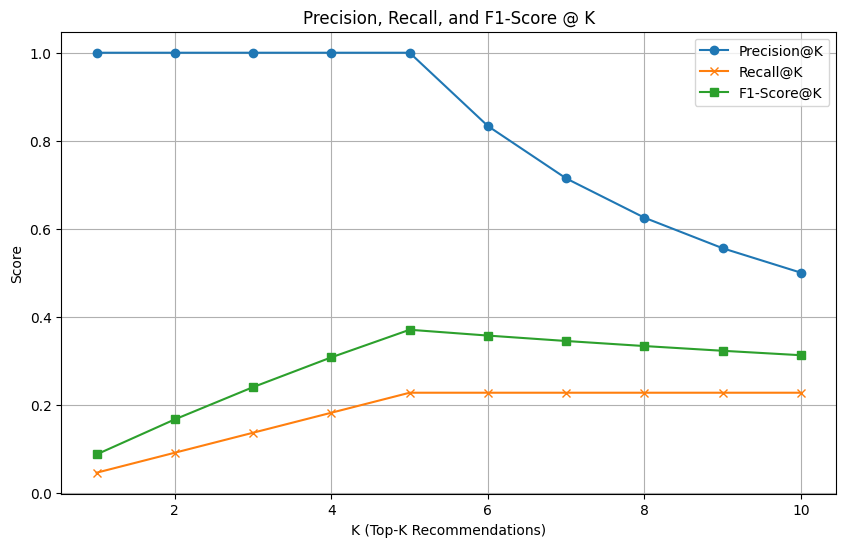

In [82]:
plot_precision_recall(recommended_movies, relevant_movies, max_k=10)

In [88]:
import pickle
# pickle.dump(new_movies,open('movies.pkl','wb'))
pickle.dump(new_movies.to_dict(),open('movie_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))